In [107]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3d17f4e7-cdc8-4420-8624-c49cc80171b6',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-01-05T08:39:59.737Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 10507}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11854, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [109]:
type(data)

dict

In [111]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [113]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11854,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19805937.00000,19805937.00000,False,NaN,1,None,None,None,2025-01-05T08:39:00.000Z,97903.30952,20233652290.95785,-42.16490,-0.42411,-0.26147,3.10163,-0.75292,33.78932,53.91394,1939066780415.37744,55.64970,2055969499888.98999,None,2025-01-05T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 11:40:19.582031
1,1027,Ethereum,ETH,ethereum,9789,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120474080.17316,120474080.17316,True,NaN,2,None,None,None,2025-01-05T08:39:00.000Z,3620.07632,15514990268.61950,-27.86590,-0.37573,0.67977,6.74596,-7.20299,39.85442,45.71172,436125364309.41589,12.51430,436125364309.41998,None,2025-01-05T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 11:40:19.582031
2,825,Tether USDt,USDT,tether,111437,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,137271150958.81598,141437091602.25031,True,NaN,3,None,None,None,2025-01-05T08:39:00.000Z,0.99981,68322567626.39325,-31.25970,0.00388,0.00352,0.13526,-0.07605,-0.02788,-0.06284,137244431376.87320,3.93880,141409561127.48001,None,2025-01-05T08:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-05 11:40:19.582031
3,52,XRP,XRP,xrp,1493,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57410227039.00000,99986740020.00000,False,NaN,4,None,None,None,2025-01-05T08:39:00.000Z,2.38467,3758305306.65103,-31.92450,-0.80732,-2.34919,9.19641,2.43883,349.77653,340.06512,136904545368.86772,3.92910,238467172888.67001,None,2025-01-05T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 11:40:19.582031
4,5426,Solana,SOL,solana,818,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,483014716.72007,591618741.80076,True,NaN,5,None,None,None,2025-01-05T08:39:00.000Z,215.37181,2413150925.04695,-39.09260,-0.56870,-0.23686,10.40872,-10.32630,18.21600,44.41238,104027755172.41539,2.98500,127418000936.67000,None,2025-01-05T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 11:40:19.582031
5,1839,BNB,BNB,bnb,2327,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144006753.12000,144006753.12000,False,NaN,6,None,None,None,2025-01-05T08:39:00.000Z,711.66179,1423230646.90562,-22.29730,-0.07470,-0.55309,-0.56115,-2.14545,23.11411,23.30732,102484104122.16496,2.94120,102484104122.16000,None,2025-01-05T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 11:40:19.582031
6,74,Dogecoin,DOGE,dogecoin,1138,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147494576383.70526,147494576383.70526,True,NaN,7,None,None,None,2025-01-05T08:39:00.000Z,0.38618,3277167324.13223,-48.25380,-0.90501,0.24551,17.89572,-11.98430,100.29717,238.10013,56959463441.10926,1.63470,56959463441.11000,None,2025-01-05T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 11:40:19.582031
7,3408,USDC,USDC,usd-coin,24417,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,45557873230.42544,45557873230.42544,False,NaN,8,None,None,None,2025-01-05T08:39:00.000Z,0.99998,4560339736.03191,-31.47590,-0.00250,-0.00960,-0.01969,0.00685,0.02736,-0.03486,45556759304.01305,1.30760,45556759304.01000,None,2025-01-05T08:39:00.000Z,1027.00000,Ethereum,ETH

In [115]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True) # appending df nd df2
    if not os.path.isfile(r'Downloads\API.csv'):
        df.to_csv(r'Downloads\API.csv', header='column_names')
    else:
         df.to_csv(r'Downloads\API.csv', mode='a', header='False')
                
        
   # df = df.append(df2) the append methon is removed frpm pandas version 2.0


In [119]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed


KeyboardInterrupt: 

In [122]:
df10 = pd.read_csv(r'Downloads\API.csv')
df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0.00000,1,Bitcoin,BTC,bitcoin,11854,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19805900.0,19805900.0,False,NaN,1,NaN,NaN,NaN,2025-01-05T06:24:00.000Z,98351.45590945482,20217932526.785843,-43.7323,0.02620694,0.32690883,3.64371324,0.25837763,30.5823168,54.7468188,1947939100597.071,55.6885,2065380574098.55,NaN,2025-01-05T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 09:25:40.766946,NaN
1,1.00000,1027,Ethereum,ETH,ethereum,9789,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120474080.1731639,120474080.1731639,True,NaN,2,NaN,NaN,NaN,2025-01-05T06:24:00.000Z,3636.0515695696463,15646901221.256702,-27.942,0.01931882,0.98205372,7.63268373,-7.04813149,38.67778516,46.12793164,438049968306.09204,12.5207,438049968306.09,NaN,2025-01-05T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 09:25:40.766946,NaN
2,2.00000,52,XRP,XRP,xrp,1493,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.0,57410227039.0,99986740020.0,False,NaN,3,NaN,NaN,NaN,2025-01-05T06:24:00.000Z,2.394516310885916,3677184605.864629,-36.5964,-0.23465677,-2.48363668,10.08272193,1.5123781,344.26728717,342.59293812,137469725056.54913,3.9299,239451631088.59,NaN,2025-01-05T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 09:25:40.766946,NaN
3,3.00000,825,Tether USDt,USDT,tether,111433,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,137271150958.81598,141437091602.2503,True,NaN,4,NaN,NaN,NaN,2025-01-05T06:24:00.000Z,0.9997477255814441,68704924024.40622,-31.8781,-0.00704735,0.01217278,0.14335903,-0.08529002,-0.02487732,-0.0137746,137236520959.02335,3.9232,141401410642.2,NaN,2025-01-05T06:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-05 09:25:40.766946,NaN
4,4.00000,5426,Solana,SOL,solana,818,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,483015823.13569564,591619477.2854122,True,NaN,5,NaN,NaN,NaN,2025-01-05T06:24:00.000Z,216.71821027746844,2425967679.8524427,-41.1431,-0.15579643,-0.17398991,11.41176369,-9.31728038,15.42378515,45.37670738,104678324725.6662,2.992,128214714282.59,NaN,2025-01-05T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 09:25:40.766946,NaN
5,5.00000,1839,BNB,BNB,bnb,2327,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144006758.0,144006758.0,False,NaN,6,NaN,NaN,NaN,2025-01-05T06:24:00.000Z,711.4729878565455,1424785078.668584,-23.882,-0.13826508,-0.90407246,0.01036987,-2.39784295,21.84270218,23.73253271,102456918385.79448,2.929,102456918385.79,NaN,2025-01-05T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 09:25:40.766946,NaN
6,6.00000,74,Dogecoin,DOGE,dogecoin,1138,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,147493446383.7052,147493446383.7052,True,NaN,7,NaN,NaN,NaN,2025-01-05T06:24:00.000Z,0.391091694562007,3356231714.3833804,-45.6575,0.36322861,0.79035144,20.31568947,-10.68786543,85.89991762,242.69109497,57683461882.99379,1.649,57683461882.99,NaN,2025-01-05T06:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 09:25:40.766946,NaN
7,7.00000,3408,USDC,USDC,usd-coin,24414,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,45551381458.82395,45551381458.82395,False,NaN,8,NaN,NaN,NaN,2025-01-05T06:2

In [124]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [126]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11854,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19805937.00000,19805937.00000,False,NaN,1,None,None,None,2025-01-05T08:39:00.000Z,97903.30952,20233652290.95785,-42.16490,-0.42411,-0.26147,3.10163,-0.75292,33.78932,53.91394,1939066780415.37744,55.64970,2055969499888.98999,None,2025-01-05T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 11:40:19.582031,NaT
1,1027,Ethereum,ETH,ethereum,9789,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120474080.17316,120474080.17316,True,NaN,2,None,None,None,2025-01-05T08:39:00.000Z,3620.07632,15514990268.61950,-27.86590,-0.37573,0.67977,6.74596,-7.20299,39.85442,45.71172,436125364309.41589,12.51430,436125364309.41998,None,2025-01-05T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 11:40:19.582031,NaT
2,825,Tether USDt,USDT,tether,111437,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,137271150958.81598,141437091602.25031,True,NaN,3,None,None,None,2025-01-05T08:39:00.000Z,0.99981,68322567626.39325,-31.25970,0.00388,0.00352,0.13526,-0.07605,-0.02788,-0.06284,137244431376.87320,3.93880,141409561127.48001,None,2025-01-05T08:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-05 11:40:19.582031,NaT
3,52,XRP,XRP,xrp,1493,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57410227039.00000,99986740020.00000,False,NaN,4,None,None,None,2025-01-05T08:39:00.000Z,2.38467,3758305306.65103,-31.92450,-0.80732,-2.34919,9.19641,2.43883,349.77653,340.06512,136904545368.86772,3.92910,238467172888.67001,None,2025-01-05T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 11:40:19.582031,NaT
4,5426,Solana,SOL,solana,818,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,483014716.72007,591618741.80076,True,NaN,5,None,None,None,2025-01-05T08:39:00.000Z,215.37181,2413150925.04695,-39.09260,-0.56870,-0.23686,10.40872,-10.32630,18.21600,44.41238,104027755172.41539,2.98500,127418000936.67000,None,2025-01-05T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 11:40:19.582031,NaT
5,1839,BNB,BNB,bnb,2327,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144006753.12000,144006753.12000,False,NaN,6,None,None,None,2025-01-05T08:39:00.000Z,711.66179,1423230646.90562,-22.29730,-0.07470,-0.55309,-0.56115,-2.14545,23.11411,23.30732,102484104122.16496,2.94120,102484104122.16000,None,2025-01-05T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 11:40:19.582031,NaT
6,74,Dogecoin,DOGE,dogecoin,1138,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147494576383.70526,147494576383.70526,True,NaN,7,None,None,None,2025-01-05T08:39:00.000Z,0.38618,3277167324.13223,-48.25380,-0.90501,0.24551,17.89572,-11.98430,100.29717,238.10013,56959463441.10926,1.63470,56959463441.11000,None,2025-01-05T08:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-05 11:40:19.582031,NaT
7,3408,USDC,USDC,usd-coin,24417,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,45557873230.42544,45557873230.42544,False,NaN,8,None,None,None,2025-01-05T08:39:00.000Z,0.99998,4560339736.03191,-31.47590,-0.00250,-0.00960,-0.01969,0.00685,0.02736,-0.03486,45556759304.01305,1.30760,45556759304.01000,None,2025-01-05

In [128]:
# Now let's look at the coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.45318,-0.28390,3.08087,-0.81179,33.62247,53.85872
Ethereum,-0.37046,0.74153,6.75183,-7.21478,39.70054,45.74753
Tether USDt,0.00586,0.00529,0.13680,-0.07146,-0.03178,-0.02997
XRP,-0.85189,-2.35283,9.12923,2.37026,349.21431,339.92163
Solana,-0.58172,-0.24289,10.36390,-10.28833,18.06720,44.48371
BNB,-0.10407,-0.52989,-0.58157,-2.14289,23.00089,23.27483
Dogecoin,-0.92010,0.29979,17.84503,-12.04358,99.91202,238.00824
USDC,0.00219,-0.00566,-0.01550,0.00983,0.02324,-0.00981
Cardano,-1.80338,1.63533,21.95339,-8.88925,203.75061,197.62954


In [130]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.45318
             quote.USD.percent_change_24h    -0.28390
             quote.USD.percent_change_7d      3.08087
             quote.USD.percent_change_30d    -0.81179
             quote.USD.percent_change_60d    33.62247
             quote.USD.percent_change_90d    53.85872
Ethereum     quote.USD.percent_change_1h     -0.37046
             quote.USD.percent_change_24h     0.74153
             quote.USD.percent_change_7d      6.75183
             quote.USD.percent_change_30d    -7.21478
             quote.USD.percent_change_60d    39.70054
             quote.USD.percent_change_90d    45.74753
Tether USDt  quote.USD.percent_change_1h      0.00586
             quote.USD.percent_change_24h     0.00529
             quote.USD.percent_change_7d      0.13680
             quote.USD.percent_change_30d    -0.07146
             quote.USD.percent_change_60d    -0.03178
             quote.USD.percent_change_90

In [132]:
type(df4)

pandas.core.series.Series

In [134]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.45318
            quote.USD.percent_change_24h  -0.28390
            quote.USD.percent_change_7d    3.08087
            quote.USD.percent_change_30d  -0.81179
            quote.USD.percent_change_60d  33.62247
            quote.USD.percent_change_90d  53.85872
Ethereum    quote.USD.percent_change_1h   -0.37046
            quote.USD.percent_change_24h   0.74153
            quote.USD.percent_change_7d    6.75183
            quote.USD.percent_change_30d  -7.21478
            quote.USD.percent_change_60d  39.70054
            quote.USD.percent_change_90d  45.74753
Tether USDt quote.USD.percent_change_1h    0.00586
            quote.USD.percent_change_24h   0.00529
            quote.USD.percent_change_7d    0.13680
            quote.USD.percent_change_30d  -0.07146
            quote.USD.percent_change_60d  -0.03178
            quote.USD.percent_change_90d  -0.02997
XRP         quote.USD.percent_change_1h   -0.85189
            quote.USD.percent_change_24h  -2.35283
            quote.USD.percent_change_7d    9.12923
            quote.USD.percent_change_30d   2.37026
            quote.USD.percent_change_60d 349.21431
            quote.USD.percent_change_90d 339.92163
Solana      quote.USD.percent_change_1h   -0.58172
            quote.USD.percent_change_24h  -0.24289
            quote.USD.percent_change_7d   10.36390
            quote.USD.percent_change_30d -10.28833
            quote.USD.percent_change_60d  18.06720
            quote.USD.percent_change_90d  44.48371
BNB         quote.USD.percent_change_1h   -0.10407
            quote.USD.percent_change_24h  -0.52989
            quote.USD.percent_change_7d   -0.58157
            quote.USD.percent_change_30d  -2.14289
            quote.USD.percent_change_60d  23.00089
            quote.USD.percent_change_90d  23.27483
Dogecoin    quote.USD.percent_change_1h   -0.92010
            quote.USD.percent_change_24h   0.29979
            quote.USD.percent_change_7d   17.84503
            quote.USD.percent_change_30d -12.04358
            quote.USD.percent_change_60d  99.91202
            quote.USD.percent_change_90d 238.00824
USDC        quote.USD.percent_change_1h    0.00219
            quote.USD.percent_change_24h  -0.00566
            quote.USD.percent_change_7d   -0.01550
            quote.USD.percent_change_30d   0.00983
            quote.USD.percent_change_60d   0.02324
            quote.USD.percent_change_90d  -0.00981
Cardano     quote.USD.percent_change_1h   -1.80338
            quote.USD.percent_change_24h   1.63533
            quote.USD.percent_change_7d   21.95339
            quote.USD.percent_change_30d  -8.88925
            quote.USD.percent_change_60d 203.75061
            quote.USD.percent_change_90d 197.62954
TRON        quote.USD.percent_change_1h   -0.46857
            quote.USD.percent_change_24h  -1.34786
            quote.USD.percent_change_7d    0.69466
            quote.USD.percent_change_30d -19.04859
            quote.USD.percent_change_60d  63.31607
            quote.USD.percent_change_90d  70.82932
Avalanche   quote.USD.percent_change_1h   -1.37578
            quote.USD.percent_change_24h   0.59217
            quote.USD.percent_change_7d   12.36443
            quote.USD.percent_change_30d -20.59409
            quote.USD.percent_change_60d  63.07465
            quote.USD.percent_change_90d  53.92276
Sui         quote.USD.percent_change_1h   -0.66932
            quote.USD.percent_change_24h   1.73209
            quote.USD.percent_change_7d   21.64147
            quote.USD.percent_change_30d  17.20528
            quote.USD.percent_change_60d 134.52222
            quote.USD.percent_change_90d 161.43977
Chainlink   quote.USD.percent_change_1h   -1.56447
            quote.USD.percent_change_24h   0.91023
            quote.USD.percent_change_7d    7.50491
            quote.USD.percent_change_30d  -2.96372
            quote.USD.percent_change_60d  99.58050
            quo

In [136]:
type(df5)

pandas.core.frame.DataFrame

In [138]:
df5.count()

values    90
dtype: int64

In [140]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45318
1,Bitcoin,quote.USD.percent_change_24h,-0.28390
2,Bitcoin,quote.USD.percent_change_7d,3.08087
3,Bitcoin,quote.USD.percent_change_30d,-0.81179
4,Bitcoin,quote.USD.percent_change_60d,33.62247
5,Bitcoin,quote.USD.percent_change_90d,53.85872
6,Ethereum,quote.USD.percent_change_1h,-0.37046
7,Ethereum,quote.USD.percent_change_24h,0.74153
8,Ethereum,quote.USD.percent_change_7d,6.75183
9,Ethereum,quote.USD.percent_change_30d,-7.21478


In [142]:

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45318
1,Bitcoin,quote.USD.percent_change_24h,-0.28390
2,Bitcoin,quote.USD.percent_change_7d,3.08087
3,Bitcoin,quote.USD.percent_change_30d,-0.81179
4,Bitcoin,quote.USD.percent_change_60d,33.62247
5,Bitcoin,quote.USD.percent_change_90d,53.85872
6,Ethereum,quote.USD.percent_change_1h,-0.37046
7,Ethereum,quote.USD.percent_change_24h,0.74153
8,Ethereum,quote.USD.percent_change_7d,6.75183
9,Ethereum,quote.USD.percent_change_30d,-7.21478


In [144]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.45318
1,Bitcoin,24h,-0.28390
2,Bitcoin,7d,3.08087
3,Bitcoin,30d,-0.81179
4,Bitcoin,60d,33.62247
5,Bitcoin,90d,53.85872
6,Ethereum,quote.USD.percent_change_1h,-0.37046
7,Ethereum,24h,0.74153
8,Ethereum,7d,6.75183
9,Ethereum,30d,-7.21478


In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

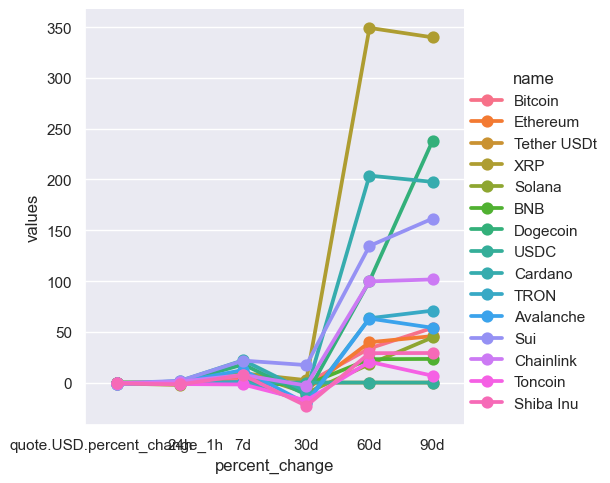

In [148]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [156]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df11 = df[['name','quote.USD.price','timestamp']]
df11 = df11.query("name == 'Bitcoin'")
df11

,name,quote.USD.price,timestamp
0,Bitcoin,97903.30952,2025-01-05 11:40:19.582031
15,Bitcoin,97840.05753,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

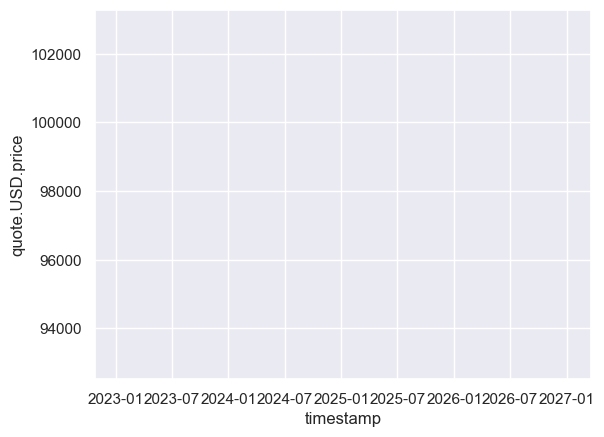

In [158]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df11)